In [76]:
import time
import matplotlib.pyplot as plt

In [77]:
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def func1(a, b, c, x):
    return round((a + (b * x) + (c * (x ** 2))), 2)

def generate_array(a, b, c):
    array = []
    for item in index:
        array.append(func1(a, b, c, item))
    return array

def calc_loss(y1, y2):
    loss = 0
    for item in index:
        loss += abs(y1[item] - y2[item])
    return loss

def calc_grad(a, b, c, y1):
    au = a + 0.01
    bu = b + 0.01
    cu = c + 0.01

    yua = generate_array(au, b, c)
    yub = generate_array(a, bu, c)
    yuc = generate_array(a, b, cu)

    ua_loss = calc_loss(y1, yua)
    ub_loss = calc_loss(y1, yub)
    uc_loss = calc_loss(y1, yuc)

    return ua_loss, ub_loss, uc_loss

def update_params(ua_loss, ub_loss, uc_loss, previous_loss, learning_rate):
    update_a = (previous_loss - ua_loss) * learning_rate
    update_b = (previous_loss - ub_loss) * learning_rate
    update_c = (previous_loss - uc_loss) * learning_rate

    return update_a, update_b, update_c

In [78]:
a1 = 5.45
b1 = 1.76
c1 = 2.0

y1 = generate_array(a1, b1, c1)

In [79]:
a2 = 2.37
b2 = 1.22
c2 = 3.06

y2 = generate_array(a2, b2, c2)

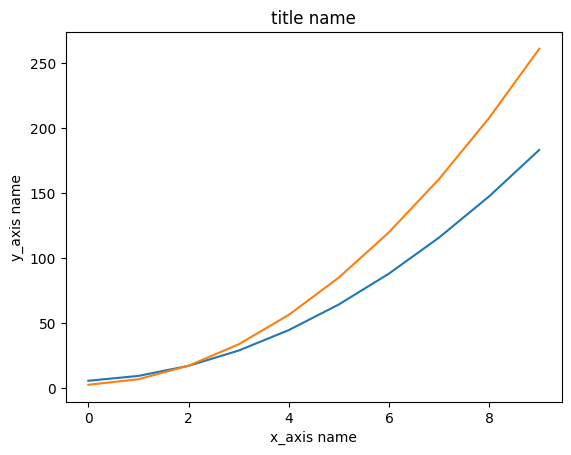

In [80]:
plt.plot(index, y1)
plt.plot(index, y2)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

In [81]:
init_loss = calc_loss(y1, y2)

print(init_loss)

258.28


In [82]:
a2n = a2
b2n = b2
c2n = c2
y2n = generate_array(a2n, b2n, c2n)
loss = init_loss

In [83]:
for step in range(10000000):
    ua_loss, ub_loss, uc_loss = calc_grad(a2n, b2n, c2n, y1)

    update_a, update_b, update_c = update_params(ua_loss, ub_loss, uc_loss, loss, 0.0001)

    a2n += update_a
    b2n += update_b
    c2n += update_c

    y2n = generate_array(a2n, b2n, c2n)

    previous_loss = loss

    loss = calc_loss(y1, y2n)

    # if previous_loss < loss:
    #     break

    # print(step)

    # time.sleep(0.2)

    # print(a2n, b2n, previous_loss)

    # plt.plot(index, y1)
    # plt.plot(index, y2n)
    # plt.title('title name')
    # plt.xlabel('x_axis name')
    # plt.ylabel('y_axis name')
    # plt.show()

5.45 1.76 2.0 258.28
4.266371999958521 2.519977999967151 1.9146700000231485 5.149999999999982


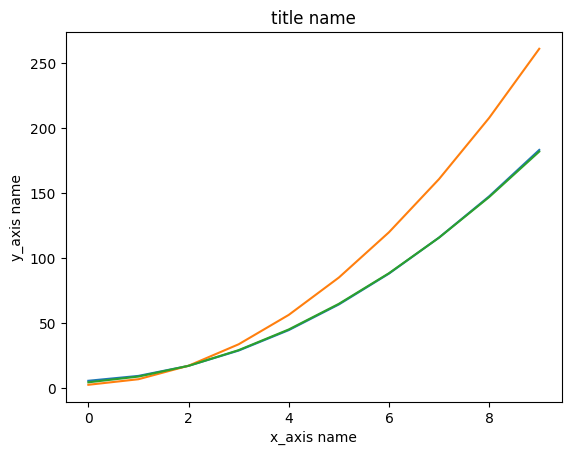

In [86]:
print(a1, b1, c1, init_loss)
print(a2n, b2n, c2n, loss)

plt.plot(index, y1)
plt.plot(index, y2)
plt.plot(index, y2n)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()